In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import eig

In [22]:
data = np.array([[3,4],[2,8],[6,9]])
data

array([[3, 4],
       [2, 8],
       [6, 9]])

In [23]:
data.T

array([[3, 2, 6],
       [4, 8, 9]])

In [24]:
df = pd.DataFrame(data, columns=['Phy','Maths'])
df

,Phy,Maths
0,3,4
1,2,8
2,6,9


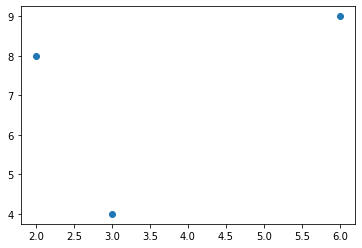

In [25]:
plt.scatter(df.Phy,df.Maths)

In [26]:
meanbycolumn = np.mean(data.T,axis=1)
meanbycolumn

array([3.66666667, 7.        ])

In [27]:
scaleddata = data - meanbycolumn
scaleddata

array([[-0.66666667, -3.        ],
       [-1.66666667,  1.        ],
       [ 2.33333333,  2.        ]])

In [28]:
cov_mat = np.cov(scaleddata.T)
cov_mat

array([[4.33333333, 2.5       ],
       [2.5       , 7.        ]])

In [29]:
Eval,Evec = eig(cov_mat)

In [30]:
# lambda1 and lambda2
Eval

array([2.83333333, 8.5       ])

In [31]:
# 2 eigen vectors
Evec

array([[-0.85749293, -0.51449576],
       [ 0.51449576, -0.85749293]])

In [34]:
projected_data = Evec.T.dot(scaleddata.T) 
projected_data.T

array([[-9.71825316e-01,  2.91547595e+00],
       [ 1.94365063e+00,  1.11022302e-16],
       [-9.71825316e-01, -2.91547595e+00]])

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit_transform(data)

array([[ 2.91547595e+00, -9.71825316e-01],
       [-6.86635020e-16,  1.94365063e+00],
       [-2.91547595e+00, -9.71825316e-01]])

In [38]:
pca.explained_variance_ratio_

array([0.75, 0.25])

In [40]:
PCDF = pd.DataFrame(data=pca.fit_transform(data),columns=['PC1','PC2'])
PCDF

,PC1,PC2
0,2.915476e+00,-0.971825
1,-6.866350e-16,1.943651
2,-2.915476e+00,-0.971825


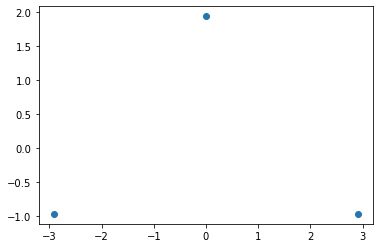

In [42]:
plt.scatter(PCDF.PC1,PCDF.PC2)

In [43]:
pca.inverse_transform(pca.fit_transform(data))

array([[3., 4.],
       [2., 8.],
       [6., 9.]])

In [45]:
# how much weight each variable has in principal components
loadings = pd.DataFrame(pca.components_.T,columns=['PC1','PC2'],index=['Phy','Maths'])
loadings

,PC1,PC2
Phy,-0.514496,-0.857493
Maths,-0.857493,0.514496
